# Data preparation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
customers.shape

(200, 5)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
np.sum(customers.isnull())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
np.sum(customers.duplicated())

0

In [7]:
customers.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

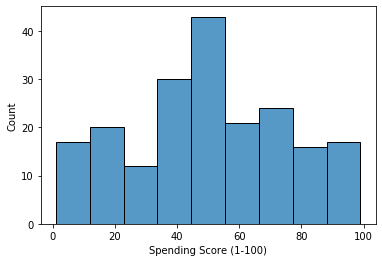

In [8]:
sns.histplot(customers['Spending Score (1-100)'])

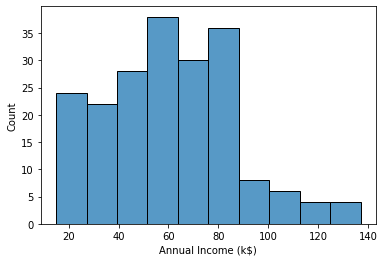

In [9]:
sns.histplot(customers['Annual Income (k$)'])

In [10]:
customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


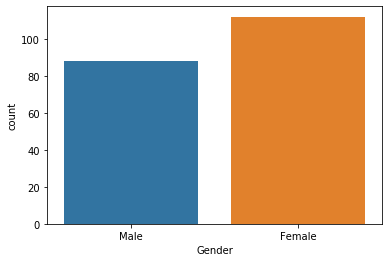

In [11]:
sns.countplot(customers['Gender'])

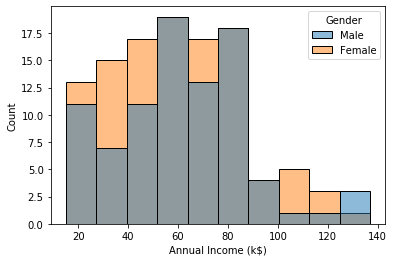

In [12]:
sns.histplot(data=customers, x="Annual Income (k$)", hue="Gender")

In [13]:
def a_range(val: int) -> str:
    if val > 0 and val < 21:
        return '0-20'
    elif val >20 and val < 41:
        return '21-40'
    elif val >40 and val < 61:
        return '41-60'
    elif val >60 and val < 81:
        return '61-80'
    elif val >80 and val < 101:
        return '81-100'
    elif val >100 and val < 121:
        return '101-120'
    elif val >120 and val < 141:
        return '121-140'    
    else:
        return False

In [14]:
customers['Income Range (k$)'] = customers['Annual Income (k$)'].apply(a_range)

In [15]:
customers['Income Range (k$)'].head()

0    0-20
1    0-20
2    0-20
3    0-20
4    0-20
Name: Income Range (k$), dtype: object

In [16]:
customers['Spendng Score Range(1-100)'] = customers['Spending Score (1-100)'].apply(a_range)

In [17]:
customers['Spendng Score Range(1-100)'].head()

0     21-40
1    81-100
2      0-20
3     61-80
4     21-40
Name: Spendng Score Range(1-100), dtype: object

In [18]:
def age_range(val: int) -> str:
    if val > 10 and val < 21:
        return '11-20'
    elif val >20 and val < 31:
        return '21-30'
    elif val >30 and val < 41:
        return '31-40'
    elif val >40 and val < 51:
        return '41-50'
    elif val >50 and val < 61:
        return '51-60'
    elif val >60 and val < 71:
        return '61-70'
    elif val >70 and val < 81:
        return '71-80'    
    else:
        return False

In [19]:
customers['Age Range'] = customers['Age'].apply(age_range)

In [20]:
customers.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Income Range (k$) Spendng Score Range(1-100) Age Range  
0              0-20                      21-40     11-20  
1              0-20                     81-100     21-30  
2              0-20                       0-20     11-20  
3              0-20                      61-80     21-30  
4              0-20                      21-40     31-40

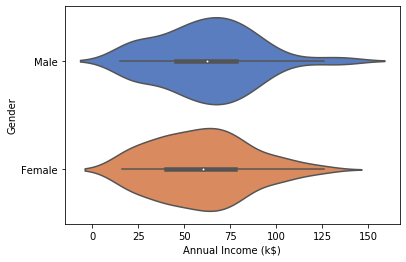

In [21]:
ax = sns.violinplot(x="Annual Income (k$)", y="Gender",
                    data=customers, palette="muted")

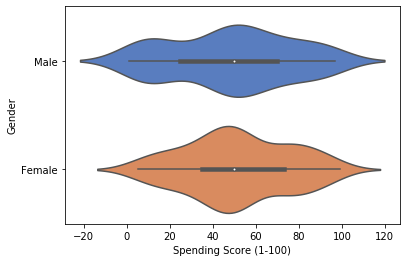

In [22]:
ax = sns.violinplot(x="Spending Score (1-100)", y="Gender",
                    data=customers, palette="muted")

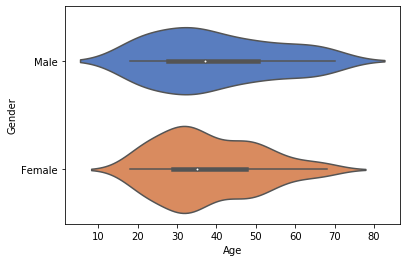

In [23]:
ax = sns.violinplot(x="Age", y="Gender",
                    data=customers, palette="muted")

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


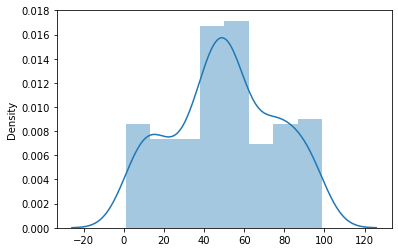

In [24]:
from scipy.stats import norm
ax = sns.distplot(x = customers['Spending Score (1-100)'])

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


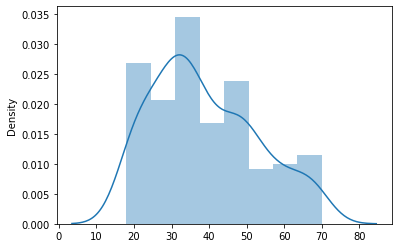

In [25]:
ax = sns.distplot(x = customers['Age'])

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


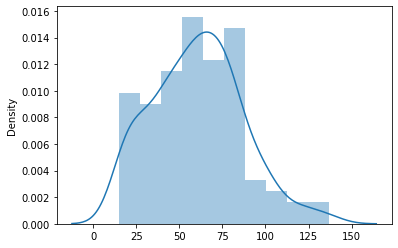

In [26]:
ax = sns.distplot(x = customers['Annual Income (k$)'])

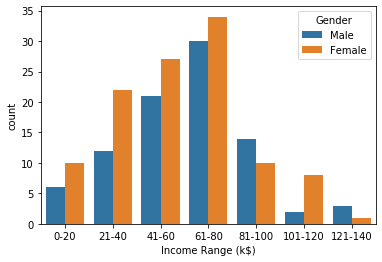

In [27]:
 sns.countplot(data=customers, x='Income Range (k$)', hue = 'Gender')

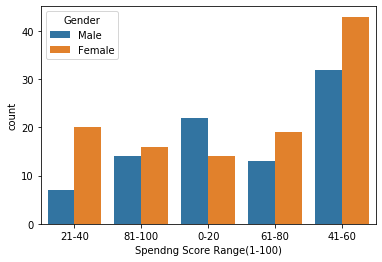

In [28]:
sns.countplot(data=customers, x='Spendng Score Range(1-100)', hue = 'Gender')

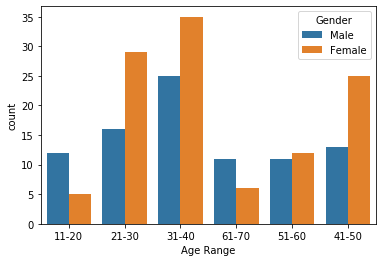

In [29]:
sns.countplot(data=customers, x='Age Range', hue = 'Gender')

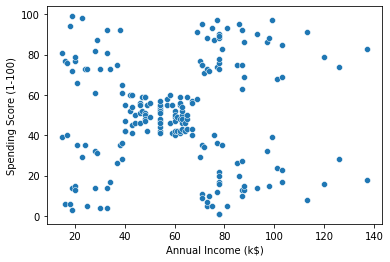

In [30]:
sns.scatterplot(data = customers, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

# Customer segmentation

In [31]:
X1 = customers.loc[:,['Age', 'Spending Score (1-100)']]

In [32]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.960393772897,
 19566.5223413776,
 15568.832381098631,
 12997.449288119293,
 11510.82975367712,
 10443.281750998605]

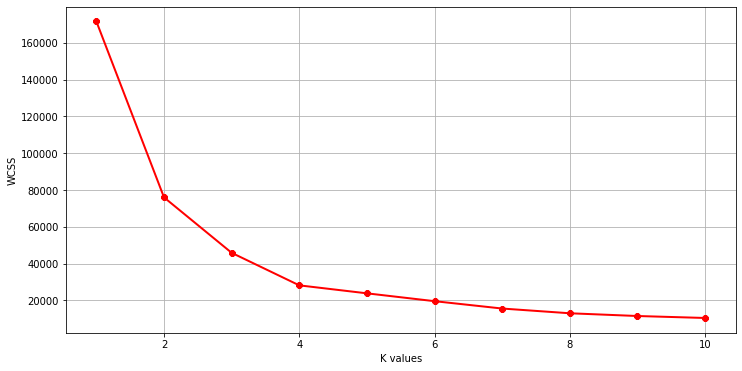

In [33]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color='red', marker = '8')
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

In [37]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X1)


In [38]:
print(y_predict)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [42]:
#centroids
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


In [52]:
X1

Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

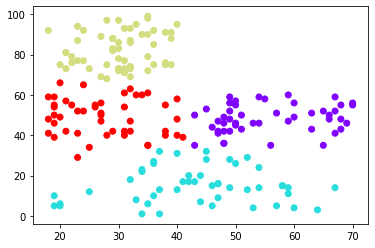

In [54]:
plt.scatter(X1['Age'], X1['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_['Age'], kmeans.cluster.centers_['Spending Score (1-100)'], color='black')
plt.title('Clusters of customers')  
plt.xlabel('Age')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()